<center><img src='https://derrickmartins.files.wordpress.com/2015/11/time-series-analysis.png?w=201&h=67'></center>
<center><h1>EDA and Classification</h1></center>

## Loading libraries to be used

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
import matplotlib.pyplot as plt
import random
from ML_custom_fun_opt import add_datepart
import tensorflow as tf
from tqdm.notebook import tqdm
from scipy import signal

In [3]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pd.options.display.max_rows = 10
pd.options.display.max_columns = 60

In [6]:
fgs = figsize=(16,6)

## Loading data

In [7]:
df = pd.read_csv('/content/drive/My Drive/CSV files/Data_Shubhinder_Sprint_Zero_Updated.csv')

In [8]:
df.Date = pd.to_datetime(df.Date)

In [9]:
set(df['Date'].dt.year)

{2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019}

In [10]:
cols = df.columns.tolist()

In [ ]:
df.head()

,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,...,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,Target
0,2010-01-08,0.013383,0.002717,-0.011797,-0.011797,0.004695,-0.005528,-0.009646,-0.009646,0.006546,-0.009209,-0.000969,-0.004808,-0.023946,-0.016317,0.002101,-0.021622,-0.002195,0.026592,0.000638,-0.007201,0.018983,0.001571,0.000634,-0.004224,-0.001698,-0.008150,-0.001439,0.014294,-0.018284,...,0.032578,0.016127,0.011146,0.011146,0.002741,-0.006739,-0.002616,0.007223,-0.002390,0.062751,0.019004,0.007444,0.007444,0.007444,0.001612,0.001612,0.001612,-0.004062,-0.006457,-0.007817,-0.000044,0.001089,0.004501,-0.006888,-0.003663,2.506003,0.001564,0.001238,0.004791,1.0
1,2010-01-11,0.002954,0.001355,0.007022,0.007022,0.012558,0.044468,-0.011851,-0.011851,0.009449,0.006574,0.007762,-0.028295,0.000913,0.026066,0.000000,0.014365,-0.025737,0.009884,0.007013,0.001181,-0.005961,-0.016311,0.006020,-0.030753,0.015023,0.005752,-0.000412,-0.005847,-0.001643,...,-0.004115,0.004761,-0.004921,-0.004921,-0.010932,-0.002610,-0.006119,-0.008516,-0.010302,-0.007985,0.016811,0.008653,0.008653,0.008653,0.001030,0.001030,0.001030,0.003884,-0.006903,-0.006130,-0.000147,-0.002779,0.010982,0.011954,0.002626,2.480373,-0.000892,0.000674,0.004567,0.0
2,2010-01-12,-0.012647,0.005864,0.006276,0.006276,0.006057,0.041814,-0.007229,-0.007229,-0.010698,-0.011712,0.005456,-0.006392,-0.019687,-0.027714,-0.048218,-0.001089,-0.025965,-0.039487,-0.009180,-0.005392,0.005247,-0.017219,-0.003465,-0.053611,-0.018431,-0.002451,0.006386,-0.057608,-0.025789,...,0.001377,-0.000132,-0.011672,-0.011672,-0.020264,-0.001047,-0.010906,-0.014467,-0.002905,-0.017581,-0.010333,-0.004791,-0.000264,-0.000264,0.006232,0.003830,0.003830,0.005223,0.002394,-0.010989,0.000015,-0.020965,-0.018945,-0.026542,-0.025930,2.280368,-0.005134,0.007189,0.000719,1.0
3,2010-01-13,0.005790,-0.000448,0.008316,0.008316,-0.002294,0.019460,0.012080,0.012080,0.017695,0.009116,-0.001117,0.005361,0.010108,0.023753,-0.004405,-0.002726,0.016690,0.021082,0.009265,0.006268,0.032066,0.015250,0.000632,0.057803,0.029018,0.017199,0.003480,0.000800,0.007040,...,-0.003439,0.012112,0.004804,0.004804,-0.002820,0.000524,0.010493,0.009633,-0.006312,0.001940,0.037588,0.000611,0.007510,0.007510,0.008211,0.004678,0.004678,-0.008083,-0.003257,0.003876,0.000029,-0.014111,0.006644,0.014981,0.017209,2.394579,0.002244,-0.004796,0.000000,1.0
4,2010-01-14,0.005234,-0.002692,0.004811,0.004811,-0.010345,0.005249,0.006540,0.006540,-0.021855,-0.009485,0.000959,0.006043,0.004477,0.020882,-0.030973,0.019683,-0.001140,-0.015829,-0.010446,-0.011448,0.003613,-0.008629,-0.009792,-0.016393,-0.004700,-0.013688,0.005304,-0.027183,0.059284,...,0.002761,-0.000520,0.005976,0.005976,-0.000629,0.004188,0.003344,0.008178,0.003909,0.006456,0.001006,0.001290,0.005930,0.005930,0.008272,0.004598,0.004598,-0.007179,0.001656,-0.001816,0.000029,-0.003264,0.005456,-0.003395,-0.012953,2.336517,0.001119,0.004707,0.001777,0.0


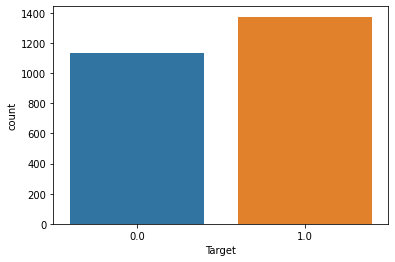

In [11]:
sns.countplot(df.Target);

## Analysing Random Rows

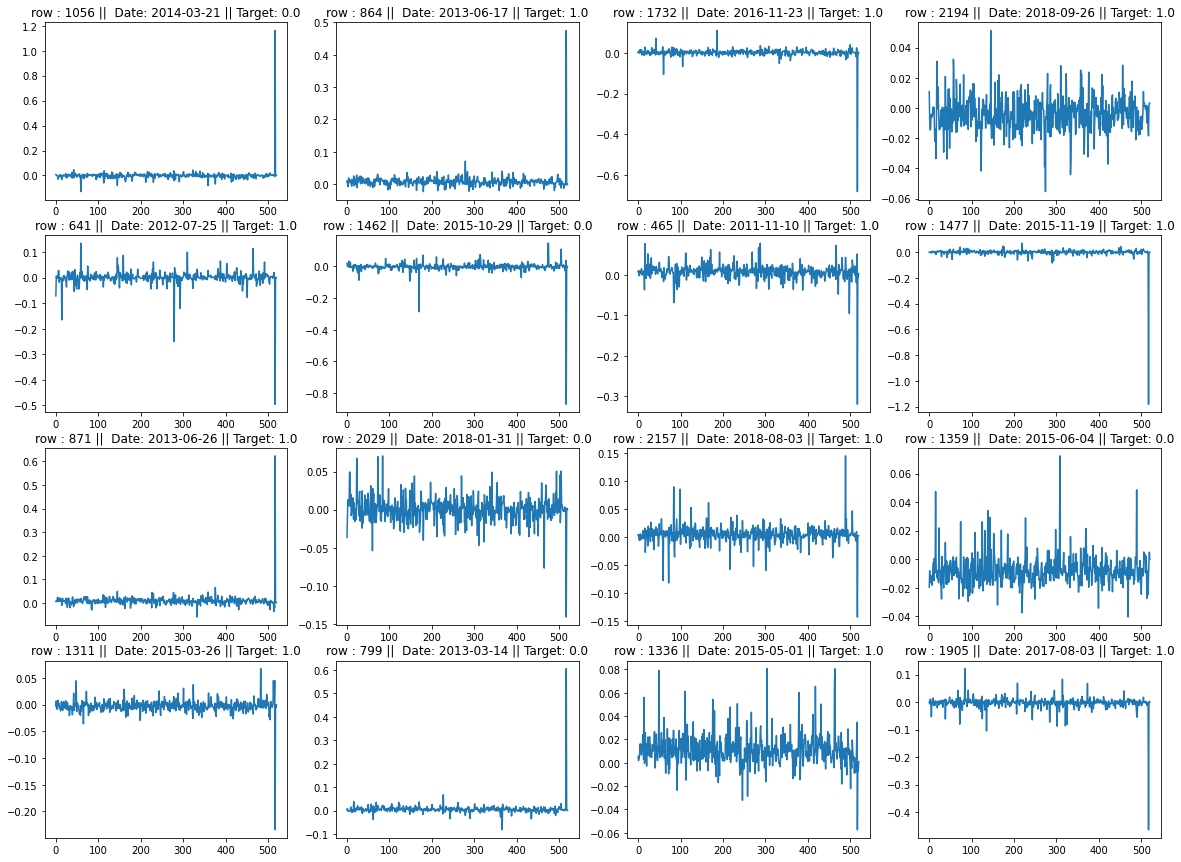

In [ ]:
plt.figure(1,figsize=(20,15))
fig = plt.figure(1,figsize=(20,15))
columns = 4
rows = 4
for i in range(rows*columns):
    fig.add_subplot(rows, columns, i+1)
    name = random.randint(0,df.shape[0])
    val = df.iloc[name].values
    plt.plot(val[1:-1]);
    plt.title('row : '+str(name)+" ||  Date: "+val[0]+" || Target: "+str(val[-1]))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

* what are these unexpectedly high values

In [ ]:
df[df.index==509]

,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,...,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,Target
509,2012-01-17,-0.003896,-0.003942,0.002095,0.002095,0.002994,0.008967,0.008579,0.008579,0.011885,0.002473,0.001993,0.005286,0.010085,0.005034,-0.002132,0.006732,-0.01147,-0.015631,0.003674,0.010048,-0.016977,0.002083,0.006776,0.014159,0.005112,-0.011503,0.005051,0.002175,-0.002035,...,-0.002611,0.001472,0.007064,0.007064,0.004307,-0.000822,0.02236,0.007551,0.015116,0.007237,-0.013194,0.000921,0.010127,0.055428,0.004217,0.003562,0.003169,-0.006541,-0.001581,-0.00117,0.001604,0.020365,0.015211,0.025881,-0.001619,-0.169705,0.002022,0.000946,0.025159,1.0


## Analysing Random Columns

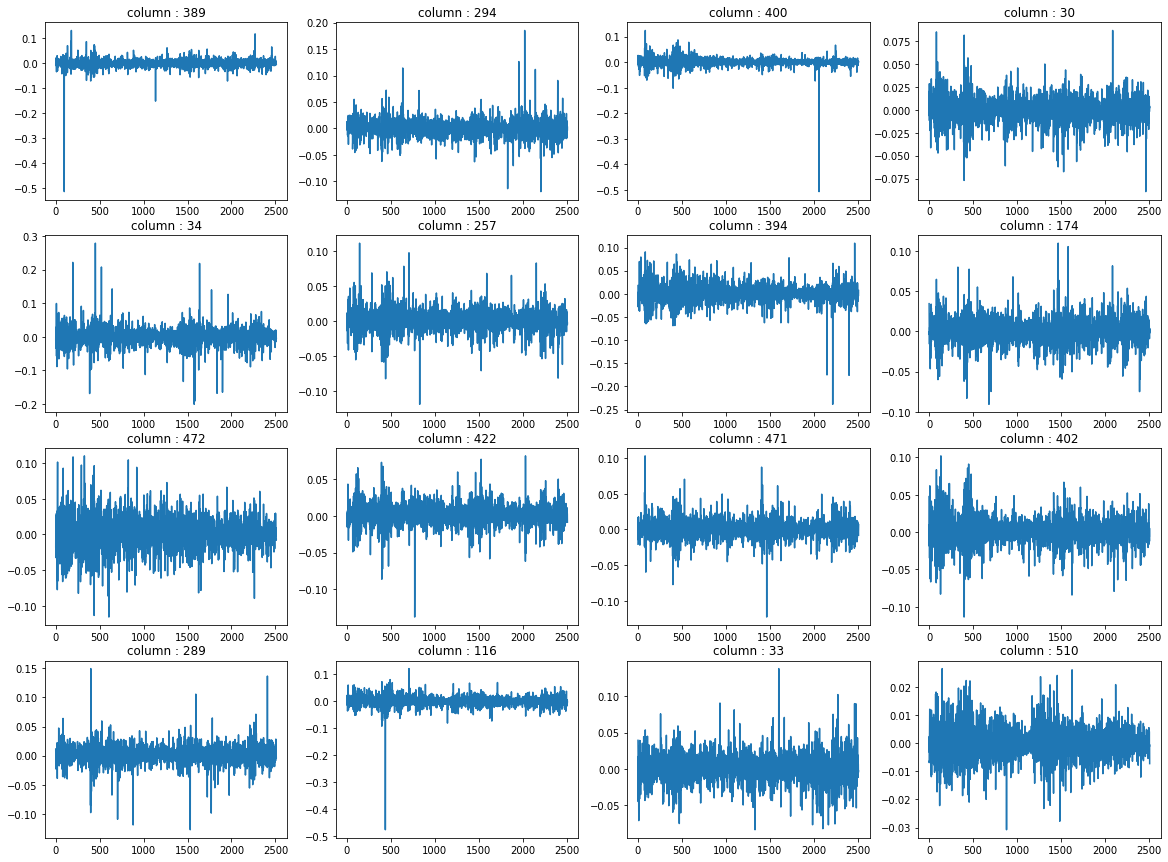

In [ ]:
plt.figure(1,figsize=(20,15))
fig = plt.figure(1,figsize=(20,15))
columns = 4
rows = 4
for i in range(rows*columns):
    fig.add_subplot(rows, columns, i+1)
    name = str(random.randint(0,520))
    plt.plot(df[name].values)
    plt.title('column : '+name)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## Let's analyse those unexpected high values of in rows

In [ ]:
from collections import Counter
from tqdm.notebook import tqdm

In [ ]:
mx = []
for row in tqdm(range(df.shape[0])):
    mx.append(np.argmax(df.iloc[row].values[1:-1]))
mx= Counter(mx)

## Let's see how many rows have max value in which column

In [ ]:
mx

Counter({2: 1,
         5: 7,
         6: 1,
         9: 2,
         10: 1,
         11: 2,
         14: 12,
         15: 1,
         16: 9,
         17: 1,
         18: 1,
         19: 3,
         21: 3,
         23: 55,
         25: 3,
         27: 2,
         28: 1,
         29: 10,
         30: 1,
         31: 1,
         32: 7,
         33: 2,
         34: 9,
         36: 2,
         37: 1,
         38: 9,
         39: 2,
         40: 4,
         41: 3,
         42: 26,
         44: 1,
         45: 8,
         46: 1,
         47: 1,
         48: 10,
         49: 4,
         52: 1,
         53: 1,
         54: 1,
         55: 15,
         57: 14,
         58: 9,
         59: 9,
         60: 2,
         61: 7,
         62: 3,
         64: 12,
         65: 4,
         66: 1,
         67: 4,
         69: 5,
         70: 8,
         72: 6,
         73: 5,
         74: 10,
         76: 1,
         78: 1,
         80: 4,
         81: 4,
         82: 2,
         83: 2,
         84: 11,
  

In [ ]:
def plot_time(year,n):
    plt.figure(1,figsize=(14,5))
    plt.plot(df[(df['Date'].dt.year==year)&(df.Target==1)][str(n)].values)
    plt.plot(df[(df['Date'].dt.year==year)&(df.Target==0)][str(n)].values);
    plt.legend(['1','0']);

## Lets see the year wise trend of a single column

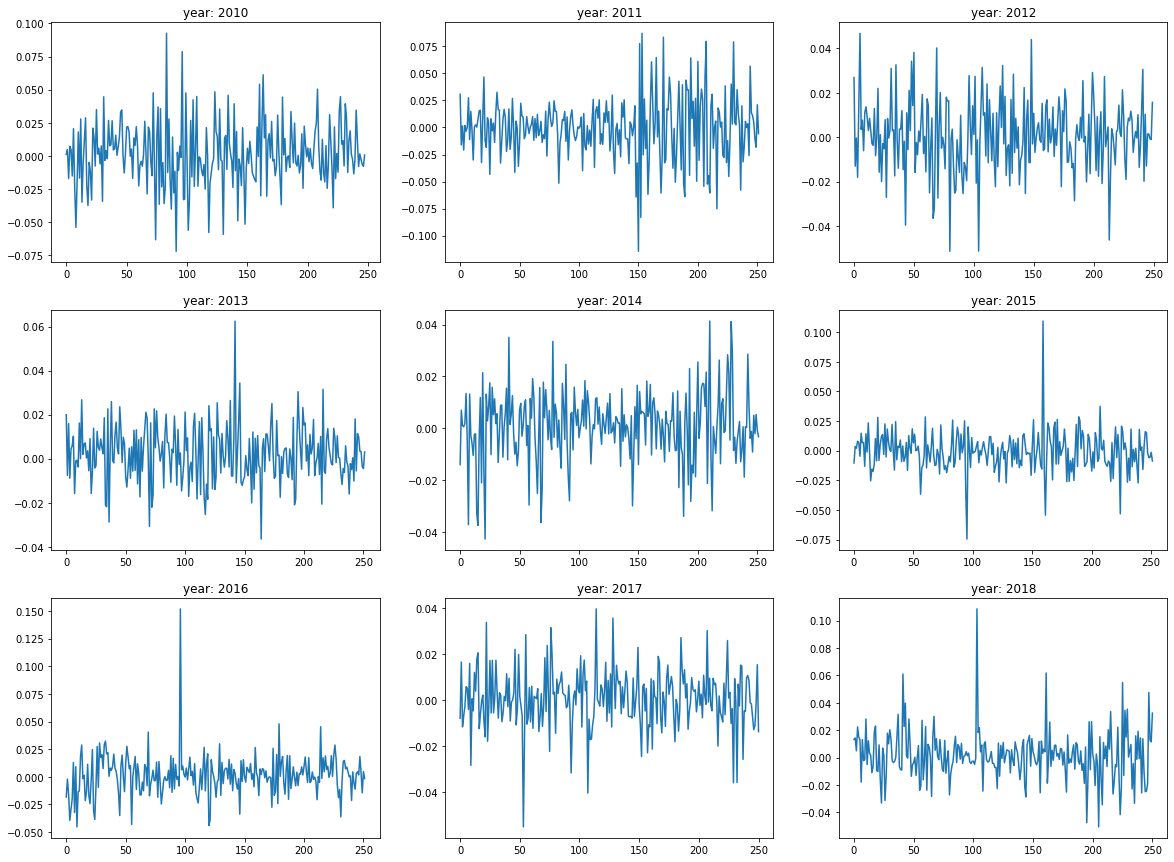

In [ ]:
plt.figure(1,figsize=(20,15))
fig = plt.figure(1,figsize=(20,10))
columns = 3
rows = 3
year = 2010
for i in range(rows*columns):
    fig.add_subplot(rows, columns, i+1)
    plt.plot(df[df['Date'].dt.year==year]['80'].values)
    plt.title('year: '+str(year))
    year+=1
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## Rolling mean of a particular columns to check if there are any trends

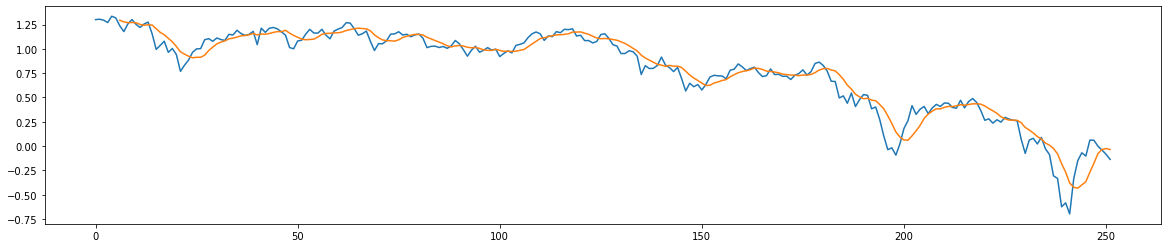

In [ ]:
plt.figure(1,figsize=(20,4))
plt.plot(df[df['Date'].dt.year==2014]['517'].values)
plt.plot(df[df['Date'].dt.year==2014]['517'].rolling(7).mean().values[:]);

## Year wise ploting of a single columns w.r.t  targets

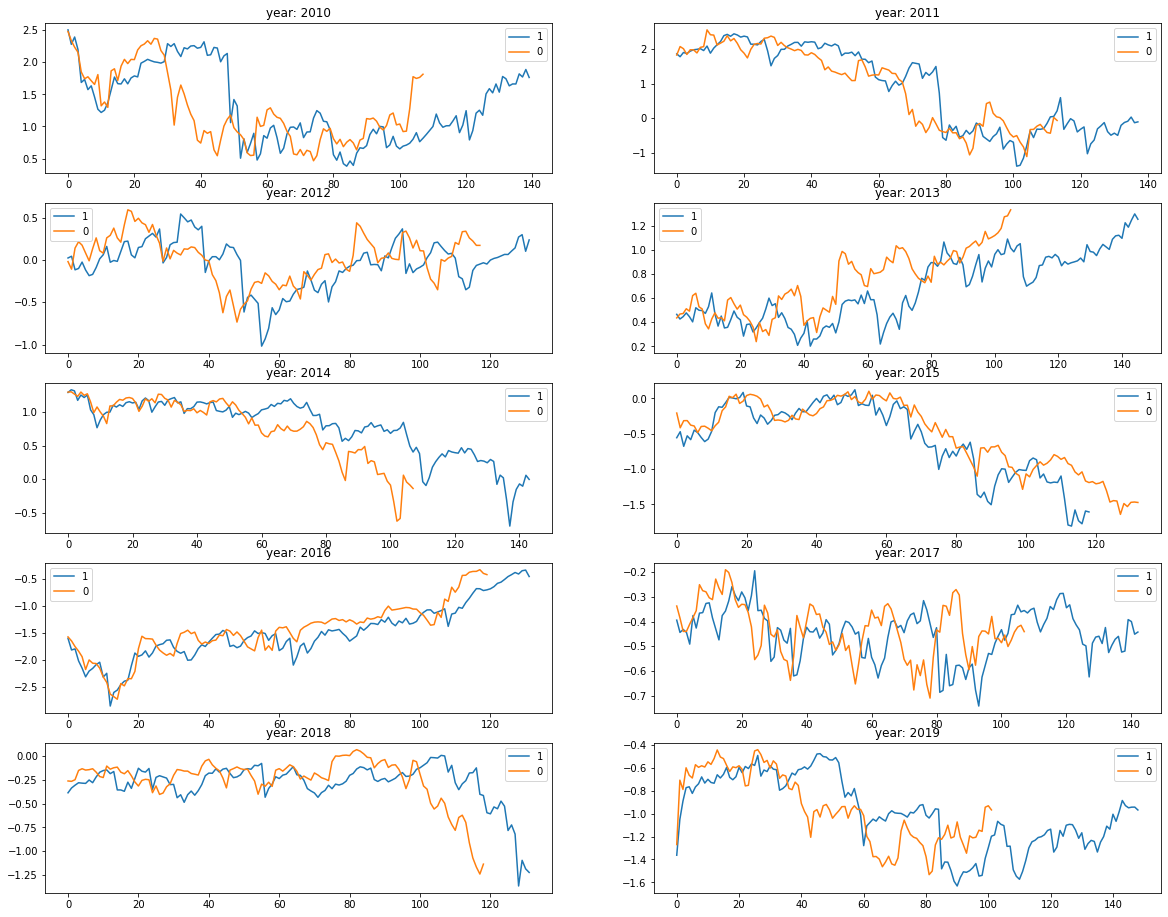

In [ ]:
fig = plt.figure(1,figsize=(20,16))
columns = 2 
rows = 5
year = 2010
for i in range(rows*columns):
    fig.add_subplot(rows, columns, i+1)
    plt.plot(df[(df['Date'].dt.year==year+i)&(df.Target==1)]['517'].values)
    plt.plot(df[(df['Date'].dt.year==year+i)&(df.Target==0)]['517'].values)
    plt.legend(['1','0'])
    plt.title('year: '+str(year+i))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

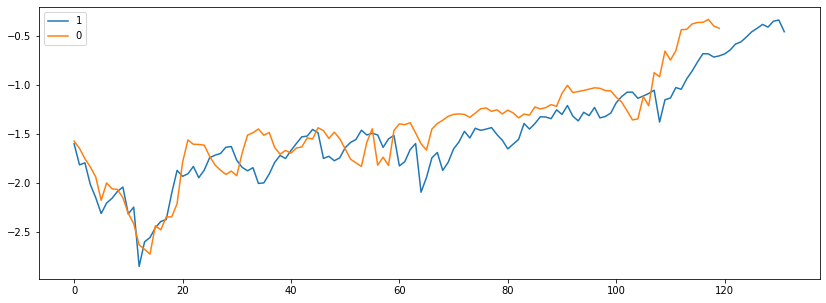

In [ ]:
plot_time(2016,517)

* **determining the lag at which the correlation is significant**

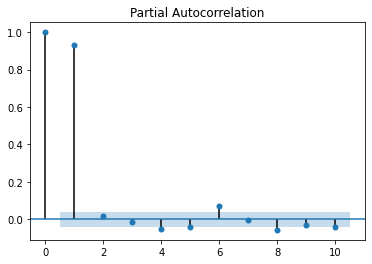

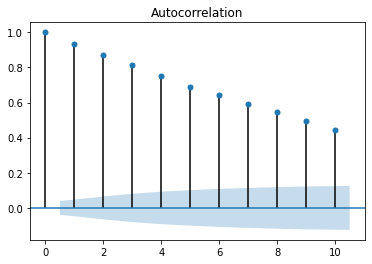

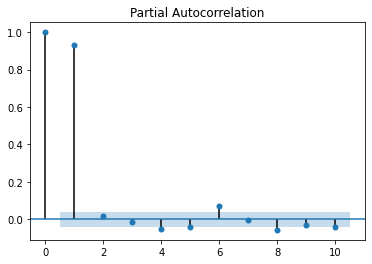

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['505'], lags=10)
plot_pacf(df['505'], lags=10)

* The partial autocorrelation function shows a high correlation with the first lag and lesser correlation with the second and third lag. 
* The autocorrelation function shows a slow decay, which means that the future values have a very high correlation with its past values.

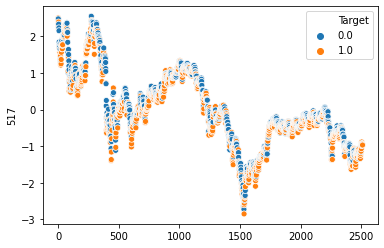

In [ ]:
sns.scatterplot(x=np.arange(df.shape[0]),y=df['517'],hue=df.Target);

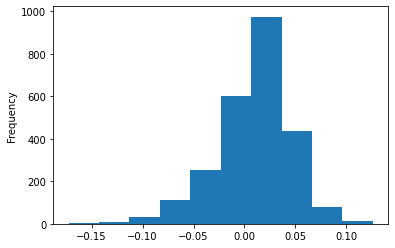

In [ ]:
df['505'].plot(kind='hist');

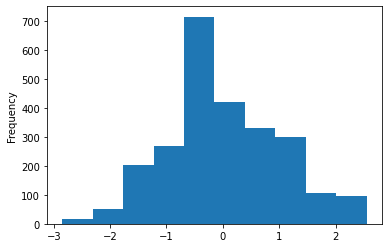

In [ ]:
df['517'].plot(kind='hist');

## Lets Check Correlation

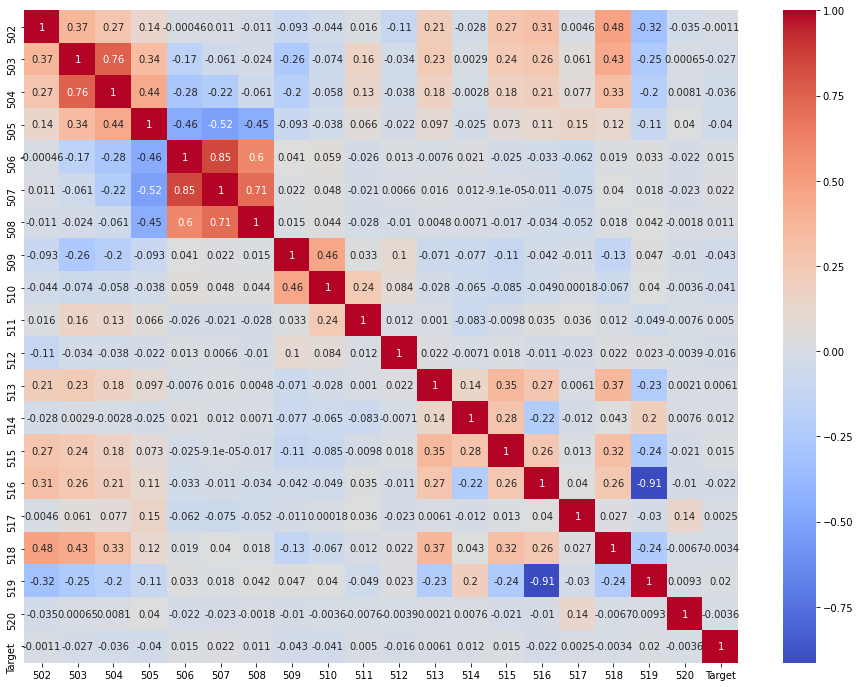

In [ ]:
plt.figure(1,figsize=(16,12))
corr = df[cols[-20:-1]+['Target']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm');

## Adding lag on columns ['517','503','504','505','506','507','508']

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
imp_col = ['517','503','504','505','506','507','508']

In [ ]:
def add_lag(df,sel_col,lag=10):
    data = df[sel_col].copy()
    for c in tqdm(sel_col):
        for i in range(1,lag+1):
            data[c+'lag_'+str(i)] = data[c].shift(i)
    return data

In [ ]:
data = add_lag(df,imp_col)
data['Date'] = df['Date']
data['Target'] = df['Target']

In [ ]:
data.fillna(value=0,inplace=True)

In [ ]:
add_datepart(data,'Date',drop=False)

In [ ]:
data.replace({True:1,False:0},inplace=True)

In [ ]:
cols = data.columns.tolist()
cols.remove('Date')
cols.remove('Target')
cols.remove('Elapsed')

## Use of autoencoder for dimensionality reduction

## Extracting features from Date eg.
* month, day, week , Day of week, Day of year, Month end, year end ,etc...

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
train_df = ss.fit_transform(data[cols])
train_df = pd.DataFrame(data=train_df,columns=cols)

## Lets see if tragets are seprable thorugh tSNE or PCA

In [ ]:
from sklearn import manifold
from sklearn.decomposition import PCA

In [ ]:
tsne = manifold.TSNE(n_components=2, random_state=42)

In [ ]:
pca = PCA(n_components=2, random_state=42)

In [ ]:
trans_data = pca.fit_transform(train_df[cols].values)

In [ ]:
trans_df = pd.DataFrame(data=trans_data,columns=['X','Y'])
trans_df['Target'] = df['Target'].values.astype(int)

In [ ]:
trans_df.head()

,X,Y,Target
0,-0.977409,1.277792,1
1,-1.678414,1.452034,0
2,-2.307919,1.679779,1
3,-2.989037,1.867158,1
4,-3.651609,2.060426,0


In [ ]:
import plotly.express as px
px.scatter_3d(trans_df,x='X',y='Y',z='Z',color = 'Target')

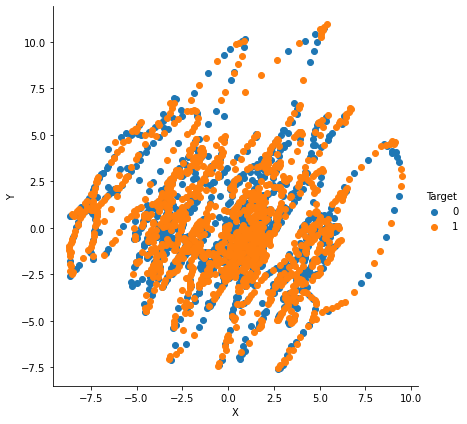

In [ ]:
grid = sns.FacetGrid(trans_df , hue='Target',height=6)
grid.map(plt.scatter,'X','Y').add_legend();

## Model training

In [ ]:
train_df['Date'] = df['Date']
train_df['Target'] = df['Target']

In [ ]:
rand_grp = random.sample(cols,len(cols));len(rand_grp)

89

In [ ]:
X_train = train_df[train_df['Date'].dt.year!=2019][rand_grp].values
y_train = train_df[train_df['Date'].dt.year!=2019].Target.values.astype(int)
X_test = train_df[train_df['Date'].dt.year==2019][rand_grp].values
y_test = train_df[train_df['Date'].dt.year==2019].Target.values.astype(int)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
idx2 = np.random.permutation(len(X_test))
X_test = X_test[idx2]
y_test = y_test[idx2]

In [ ]:
X_train.shape

(2260, 89, 1)

## model (lstm + conv1d + dense)

In [ ]:
def make_model(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)

    conv1 = tf.keras.layers.Conv1D(filters=64, kernel_size=5, padding="same")(input_layer)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.ReLU()(conv1)

    conv2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    conv2 = tf.keras.layers.ReLU()(conv2)

    lstm1 = tf.keras.layers.LSTM(64, return_sequences=True)(conv2)
    lstm2 = tf.keras.layers.LSTM(64, return_sequences=True)(lstm1)
    lstm3 = tf.keras.layers.LSTM(64, return_sequences=True)(lstm2)

    gap = tf.keras.layers.GlobalAveragePooling1D()(lstm3)
    
    d1 = tf.keras.layers.Dense(100)(gap)
    d1 = tf.keras.layers.BatchNormalization()(d1)
    d1 = tf.keras.layers.ReLU()(d1)
    
    d2 = tf.keras.layers.Dense(50, activation="relu")(d1)
    d2 = tf.keras.layers.BatchNormalization()(d2)
    d2 = tf.keras.layers.ReLU()(d2)

    output_layer = tf.keras.layers.Dense(2, activation="softmax")(d2)

    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
#tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 89, 1)]           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 89, 64)            384       
_________________________________________________________________
batch_normalization_4 (Batch (None, 89, 64)            256       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 89, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 89, 64)            12352     
_________________________________________________________________
batch_normalization_5 (Batch (None, 89, 64)            256       
_________________________________________________________________
re_lu_5 (ReLU)               (None, 89, 64)           

## callbacks

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

## Compile the model

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"])

## start training

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs = 300,
    callbacks = callbacks,
    validation_data = (X_test,y_test)
)

Epoch 1/300
71/71 [==============================] - 6s 84ms/step - loss: 0.7440 - sparse_categorical_accuracy: 0.5062 - val_loss: 0.6951 - val_sparse_categorical_accuracy: 0.4183
Epoch 2/300
71/71 [==============================] - 4s 63ms/step - loss: 0.7125 - sparse_categorical_accuracy: 0.5195 - val_loss: 0.6811 - val_sparse_categorical_accuracy: 0.5339
Epoch 3/300
71/71 [==============================] - 5s 64ms/step - loss: 0.6957 - sparse_categorical_accuracy: 0.5323 - val_loss: 0.6767 - val_sparse_categorical_accuracy: 0.5817
Epoch 4/300
71/71 [==============================] - 4s 63ms/step - loss: 0.6993 - sparse_categorical_accuracy: 0.5217 - val_loss: 0.6768 - val_sparse_categorical_accuracy: 0.5657
Epoch 5/300
71/71 [==============================] - 4s 63ms/step - loss: 0.6957 - sparse_categorical_accuracy: 0.5230 - val_loss: 0.6806 - val_sparse_categorical_accuracy: 0.5857
Epoch 6/300
71/71 [==============================] - 4s 63ms/step - loss: 0.7008 - sparse_categorica

## Evaluate Model

In [ ]:
model = tf.keras.models.load_model("best_model.h5")
test_loss, test_acc = model.evaluate(X_test, y_test);
print("Test accuracy", test_acc);

8/8 [==============================] - 0s 21ms/step - loss: 0.6758 - sparse_categorical_accuracy: 0.5857
Test accuracy 0.5856573581695557


## Lets check AUCROC score and roc curve

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [ ]:
preds = model.predict(X_test)[:,1]
roc_auc_score(y_true=y_test,y_score=preds,average='micro')

0.5447427293064877

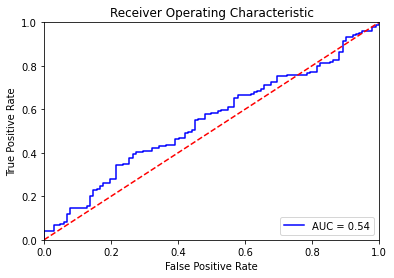

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model Performance history

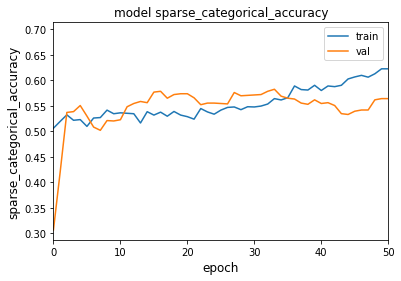

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(smooth(history.history["val_" + metric],5))
plt.title("model " + metric);plt.xlim(0,50)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()